# Plot profit script

This is script is responsible for create the graphics that will show the exatly decision of LSTM prediction.

 ### 1. Importing libs

In [ ]:
import sys
sys.path.append('../')
sys.path.append('../testboard')
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
from models.denselstm import DenseLSTM
from data_mining.stocks import Stocks
from testboard.data_mining.smote import duplicate_data
from data_mining.stocks import CLOSING, OPENING, MAX_PRICE, MIN_PRICE, MEAN_PRICE, VOLUME
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Rectangle

### 2. Load Data and Processing

In [ ]:
stocks = Stocks(year=2014, cod='PETR3', period=5)
dataset = stocks.selected_fields([CLOSING])
dataset = duplicate_data(dataset)

### 3. Creating LSTM model

In [ ]:
model = DenseLSTM(input_shape=dataset.shape[1],
                  look_back=9, lstm_cells=100, optimizer='rmsprop')
model.create_data_for_fit(dataset)
result = model.fit_and_evaluate(batch_size=128, epochs=5000)

model.model.save("PETR3-model.h5")
print("Saved ABEV3 model to disk")

### 4. Map Predictions to Labels

The *predictions_labels* receive the labels 1 or 0 based on real prediction from LSTM.

In [ ]:
prediction = model.model.predict(model.test_x)
prediction_labels = [1 if Decimal(i.item()) >= Decimal(0.50) else 0 for i in prediction]
avarange_dataset = [np.mean(dataset[i:i+9]) for i in range(len(dataset))]

In [ ]:
begin_test = int(len(dataset) - len(model.test_x))
correct_labels = [1 if dataset[i+1] >= dataset[i] else 0 for i in range(begin_test, len(dataset)-1)]
x = list(range(begin_test, len(dataset)))
y = dataset[begin_test:len(dataset)]

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 44,101
Trainable params: 44,101
Non-trainable params: 0
_________________________________________________________________
73/73 [==============================] - 0s 486us/step
[NeuralNetwork] Test Accuracy:0.7260273694992065
Saved ABEV3 model to disk
[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


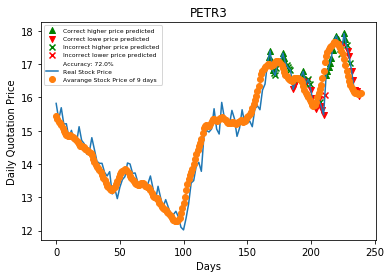

In [1]:
plt.ylabel("Daily Quotation Price")
plt.xlabel("Days")
plt.title("PETR3")
score = 0
for i in range(len(x)-1):
    if prediction_labels[i] == 1:
        if prediction_labels[i] == model.test_y[i]:
            h = plt.scatter(x[i], y[i], marker='^', c='green')
            score += 1
        else:
            hx = plt.scatter(x[i], y[i], marker='x', c='green')
    else:
        if prediction_labels[i] == model.test_y[i]:
            l = plt.scatter(x[i], y[i], marker='v', c='red')
            score += 1
        else:
            lx = plt.scatter(x[i], y[i], marker='x', c='red')

d_label, = plt.plot(dataset)
a_label, = plt.plot(avarange_dataset, 'o')

extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend((h,l,hx,lx,extra, d_label, a_label), ("Correct higher price predicted",
                               "Correct lowe price predicted",
                               "Incorrect higher price predicted",
                               "Incorrect lower price predicted",
                               "Accuracy: {}%".format(round(score/(len(x)-1), 2)*100),
                               "Real Stock Price",
                               "Avarange Stock Price of 9 days"), fontsize=6)

plt.show()